# Basics of MLP
##  Multilayer perceptrons for simple regression with Keras

### MLP Structures

Each MLP model is consisted of one input layer, several hidden layers, and one output layer

Number of neurons in each layer is not limited


Number of input neurons: 3
Number of hidden neurons: 4
Number of output neurons: 2




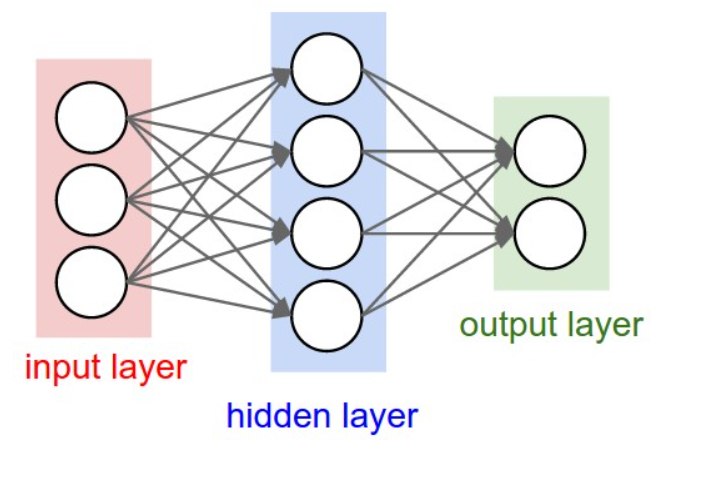

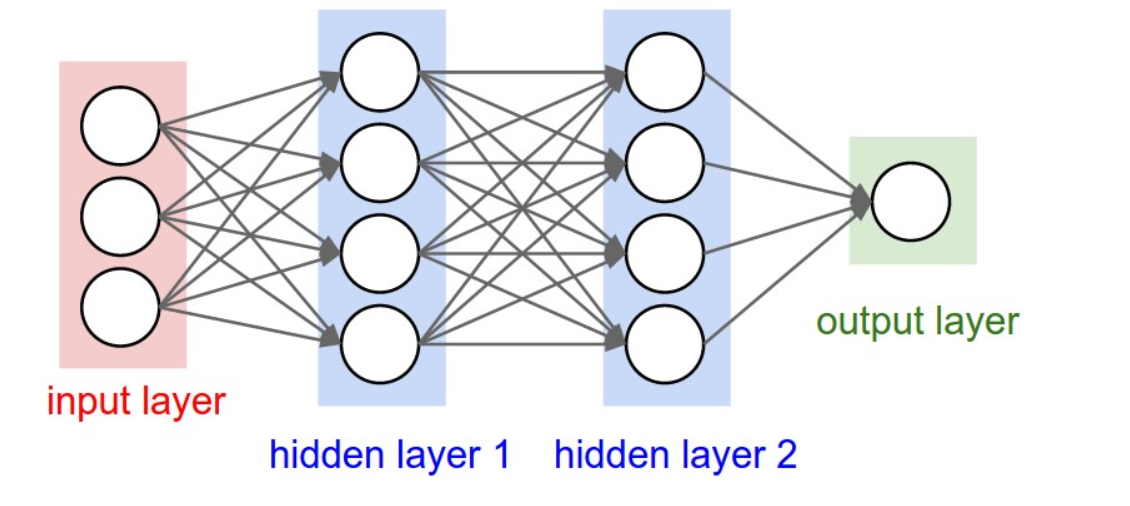

Number of input neurons: 3
Number of hidden neurons: (4, 4)
Number of output neurons: 1
## MLP for Regression tasks
### When the target (y) is continuous (real)
###  For loss function and evaluation metric, mean squared error (MSE) is commonly used

In [ ]:
import keras
import tensorflow

In [ ]:
pip install tensorflow

In [ ]:
pip install keras

In [ ]:
from keras.datasets import boston_housing

In [ ]:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# # Dataset Description
### Boston housing dataset has total 506 data instances (404 training & 102 test)
### 13 attributes (features) to predict "the median values of the houses at a location"

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

1. Creating a model
## Keras model object can be created with Sequential class

## Doc: https://keras.io/models/sequential/

In [ ]:
from keras.models import Sequential
model=Sequential()

1-1. Adding layers
Keras layers can be added to the model
Adding layers are like stacking lego blocks one by one
Doc: https://keras.io/layers/core/

In [ ]:
from keras.layers import Activation, Dense

In [ ]:
# Keras model with two hidden layer with 10 neurons each 
model.add(Dense(10, input_shape = (13,)))    # Input layer => input_shape should be explicitly designated
model.add(Activation('sigmoid'))
model.add(Dense(10))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(10))                         # Hidden layer => only output dimension should be designated
model.add(Activation('sigmoid'))
model.add(Dense(1))                          # Output layer => output dimension = 1 since it is regression problem

In [ ]:
from tensorflow.keras import optimizers

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
sgd = optimizers.SGD(lr = 0.01) 
model.compile(optimizer = sgd, loss = 'mean_squared_error', metrics = ['mse'])    # for regression problems, mean squared error (MSE) is often employed


In [ ]:
model.summary()

In [ ]:
### Training the model with training data provided

model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

In [ ]:
results = model.evaluate(X_test, y_test)

In [ ]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed

In [ ]:
print('loss: ', results[0])
print('mse: ', results[1])

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:
whole_data = load_breast_cancer()

In [ ]:
X_data = whole_data.data
y_data = whole_data.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 7)

### Dataset Description
### Breast cancer dataset has total 569 data instances (212 malign, 357 benign instances)
### 30 attributes (features) to predict the binary class (M/B)
Doc: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
from keras.models import Sequential
model = Sequential()

1-1. Adding layers
### Keras layers can be added to the model
### Adding layers are like stacking lego blocks one by one
### It should be noted that as this is a classification problem, sigmoid layer (softmax for multi-class problems) should be added
### Doc: https://keras.io/layers/core/

In [ ]:
# This is equivalent to the above code block
model.add(Dense(10, input_shape = (30,), activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(10, activation = 'sigmoid'))
model.add(Dense(1))

1-2. Model compile
### Keras model should be "compiled" prior to training
### Types of loss (function) and optimizer should be designated
### Doc (optimizers): https://keras.io/optimizers/
### Doc (losses): https://keras.io/losses/

In [ ]:
from keras import optimizers

In [ ]:
sgd = optimizers.SGD(lr = 0.01)    # stochastic gradient descent optimizer

In [ ]:
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:
model.summary()

In [ ]:
model.fit(X_train, y_train, batch_size = 50, epochs = 100, verbose = 1)

In [ ]:
results = model.evaluate(X_test, y_test)

In [ ]:
print(model.metrics_names)     # list of metric names the model is employing
print(results)                 # actual figure of metrics computed
['loss', 'acc']

In [ ]:
print('loss: ', results[0])
print('accuracy: ', results[1])